# Visualization of my Snapchat conversation history.

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('/content/chat_history.json') as json_file:
  data = json.load(json_file)

In [4]:
# Get all items in dataset
for item in data:
  print(item)

Received Saved Chat History
Sent Saved Chat History
Received Unsaved Chat History
Sent Unsaved Chat History


# We are going to start with received chat history.

In [5]:
# Combine saved and unsave chat into one larger data frame
#   for complete received chat histroy
dfReceived = pd.DataFrame(data['Received Saved Chat History'] + 
                  data['Received Unsaved Chat History'])

In [6]:
# Before showing data we will be doing some preprocessing

In [7]:
for col in dfReceived.columns:
    print(col)

From
Media Type
Created
Text


#### Preprocessing for privacy

In [8]:
# Starting with 'From'

users = []
# Get all users in df['From']
for user in dfReceived['From']:
  if user in users:
    pass
  else:
    users.append(user)
#print(users)

# Replace names for privacy
x = 0
for user in users:
  dfReceived['From'].replace(user, f'user{x}', inplace=True)
  x+=1

# Now replace all messages in df['Text']
dfReceived['Text'] = 'message'

In [9]:
dfReceived.head()

,From,Media Type,Created,Text
0,user0,TEXT,2022-09-18 03:33:18 UTC,message
1,user0,TEXT,2022-09-18 03:27:38 UTC,message
2,user0,TEXT,2022-09-18 03:13:42 UTC,message
3,user0,TEXT,2022-09-18 02:57:38 UTC,message
4,user0,TEXT,2022-09-18 02:57:32 UTC,message


In [47]:
dfReceived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188984 entries, 0 to 188983
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   From        188984 non-null  object
 1   Media Type  188984 non-null  object
 2   Created     188984 non-null  object
 3   Text        188984 non-null  object
dtypes: object(4)
memory usage: 5.8+ MB


In [10]:
dfReceived.describe()

,From,Media Type,Created,Text
count,188984,188984,188984,188984
unique,50,6,185894,1
top,user12,TEXT,2018-06-14 21:05:24 UTC,message
freq,182511,141916,11,188984


In [111]:
messageFrequency = dfReceived['From'].value_counts()
print(messageFrequency)

user12    182511
user14      1558
user4       1417
user6       1201
user29       474
user16       406
user20       193
user5        132
user26       118
user31       101
user28        94
user13        84
user48        83
user47        65
user9         56
user44        52
user19        41
user8         34
user17        34
user25        31
user11        30
user0         27
user24        23
user33        22
user23        21
user15        21
user1         15
user7         13
user2         12
user39        11
user46        11
user40        10
user18        10
user30         9
user37         7
user22         7
user35         6
user21         6
user42         5
user45         5
user38         5
user43         4
user3          4
user41         3
user32         3
user34         3
user49         2
user10         2
user27         1
user36         1
Name: From, dtype: int64


# Received Visualization

Text(0, 0.5, 'Messages received')

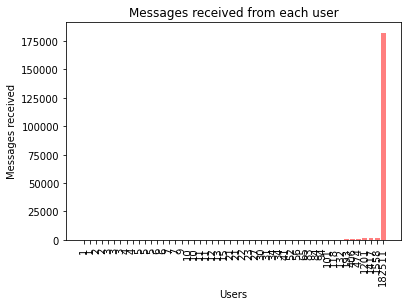

In [97]:
sort = sorted(messageFrequency)
names = [name for name in sort]
plt.bar(range(len(messageFrequency)), sort, color='red', alpha=0.5, tick_label=names)
plt.title('Messages received from each user')
plt.xlabel('Users')
plt.xticks(rotation=90)
plt.ylabel('Messages received')

As you can see we have an outlier that makes it hard to see the rest of the data.
We will remove this outlier to better vizualize the rest of the data.

In [109]:
messageFrequencyCleaned = dfReceived['From'].loc[lambda x: x !='user12'].value_counts()
print(messageFrequencyCleaned)

user14    1558
user4     1417
user6     1201
user29     474
user16     406
user20     193
user5      132
user26     118
user31     101
user28      94
user13      84
user48      83
user47      65
user9       56
user44      52
user19      41
user8       34
user17      34
user25      31
user11      30
user0       27
user24      23
user33      22
user23      21
user15      21
user1       15
user7       13
user2       12
user39      11
user46      11
user40      10
user18      10
user30       9
user37       7
user22       7
user35       6
user21       6
user42       5
user45       5
user38       5
user43       4
user3        4
user41       3
user32       3
user34       3
user49       2
user10       2
user27       1
user36       1
Name: From, dtype: int64


Text(0, 0.5, 'Messages received')

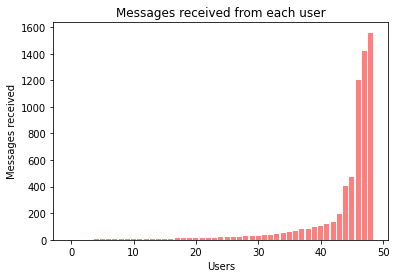

In [110]:
plt.bar(range(len(messageFrequencyCleaned)), sorted(messageFrequencyCleaned), color='red', alpha=0.5)
plt.title('Messages received from each user')
plt.xlabel('Users')
plt.ylabel('Messages received')